# Notebook to plot anomaly built

## import module

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import cartopy
import cartopy.crs as ccrs

## parameters

In [5]:
# data dir path
cdir='DATA_out'

# list of file variables to process and the corresponding infile variables
fvarlst=['Q_1_5M','LW_TOTAL_DOWNWARD_SURFACE','P_SURF','SW_TOTAL_DOWNWARD_SURFACE','TOTAL_PRECIP','T_AIR_1_5M','U_10M','V_10M']
cvarlst =['dq'   ,'dilr'                     ,'dp'    ,'dfield203'                ,'dprecip'     ,'dtemp'     ,'du'   ,'dv']

# trg period
period='21602200' #'2060-2100' #2160-2200

## Process data

    load anomaly data ...
        file : DATA_out/A1B_Q_1_5M_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


    load anomaly data ...
        file : DATA_out/A1B_LW_TOTAL_DOWNWARD_SURFACE_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


    load anomaly data ...
        file : DATA_out/A1B_P_SURF_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


    load anomaly data ...
        file : DATA_out/A1B_SW_TOTAL_DOWNWARD_SURFACE_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


    load anomaly data ...
        file : DATA_out/A1B_TOTAL_PRECIP_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


    load anomaly data ...
        file : DATA_out/A1B_T_AIR_1_5M_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


    load anomaly data ...
        file : DATA_out/A1B_U_10M_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


    load anomaly data ...
        file : DATA_out/A1B_V_10M_3h_ano_21602200-19792019.NC


/usr/local/anaconda3/envs/A1B_perturbation/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


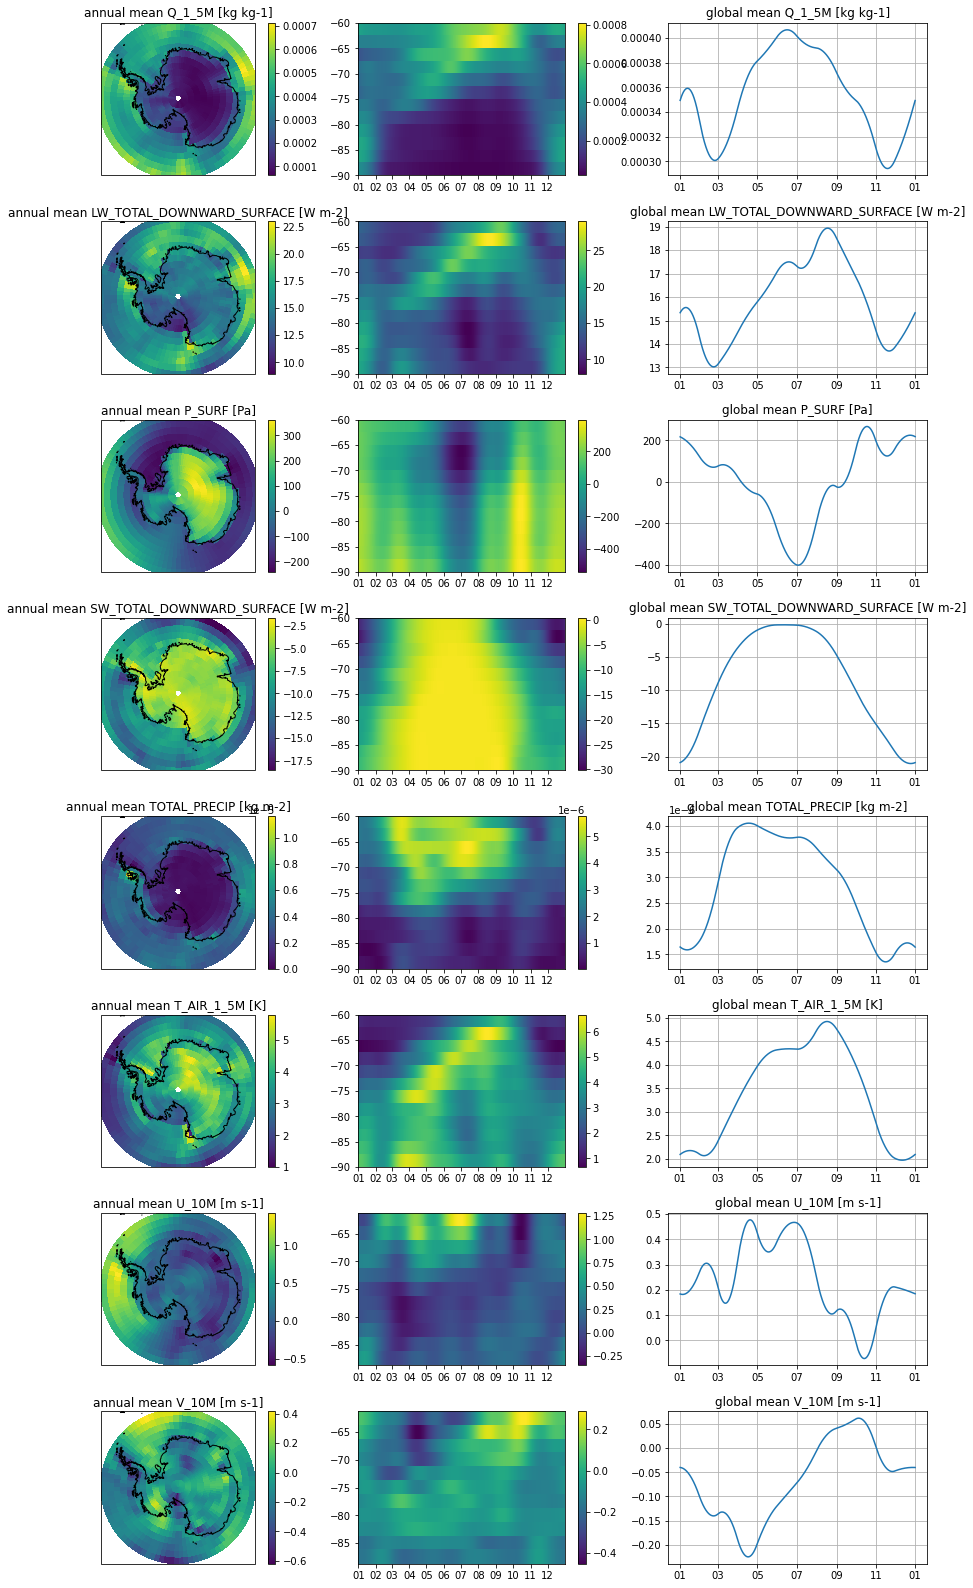

In [30]:
# define figure
fig=plt.figure(figsize=(np.array([400,120*6]) / 25.4))
grid = plt.GridSpec(len(fvarlst), 3, wspace=0.2, hspace=0.3)

# process all data
for ivar, fvar in enumerate(fvarlst):
    cvar=cvarlst[ivar]
    
    # load data
    print('    load anomaly data ...')
    cfile='{}/A1B_{}_3h_ano_{}-19792019.NC'.format(cdir,fvar,period)
    print('        file : {}'.format(cfile))
    ds_month = xr.open_dataset(cfile).sel(latitude=slice(-60,-90))
    
    # compute anual mean
    ds_annual=ds_month.mean(dim='time')
    
    # compute global mean time series
    # compute weights
    weights = np.cos(np.deg2rad(ds_month.latitude,dtype=np.float64))
    
    # compute weighted xarray
    weights.name = "weights"
    dsw = ds_month.weighted(weights)
    
    # display anomaly
    ds_ts=dsw.mean(("longitude", "latitude"))
    
    # plot
    #ax = fig.add_subplot(grid[ivar,0:2], projection=ccrs.Robinson(central_longitude=0))
    ax = fig.add_subplot(grid[ivar,0], projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0))
    pcol=ax.pcolormesh(ds_annual['longitude'],ds_annual['latitude'],ds_annual[cvar],transform=ccrs.PlateCarree())
    ax.coastlines()
    XY_lim=[(-180, 180, -90, -60),ccrs.PlateCarree()]
    ax.set_extent(XY_lim[0], XY_lim[1])
    ax.set_title('annual mean '+fvar+' ['+ds_month[cvar].attrs['units']+']')
    plt.colorbar(pcol)

    toto=ds_month.mean(dim='longitude')
    ax = fig.add_subplot(grid[ivar,1])
    pcol=ax.pcolormesh(toto['time'],toto['latitude'],toto[cvar].transpose())
    date_form = DateFormatter("%m")
    ax.xaxis.set_major_formatter(date_form)
    plt.colorbar(pcol)

    ax = fig.add_subplot(grid[ivar,2])
    ax.plot(ds_ts['time'],ds_ts[cvar])
    ax.grid()
    ax.set_title('global mean '+fvar+' ['+ds_month[cvar].attrs['units']+']')
    date_form = DateFormatter("%m")
    ax.xaxis.set_major_formatter(date_form)